# Predicting White Wine Quality - Machine Learning Project

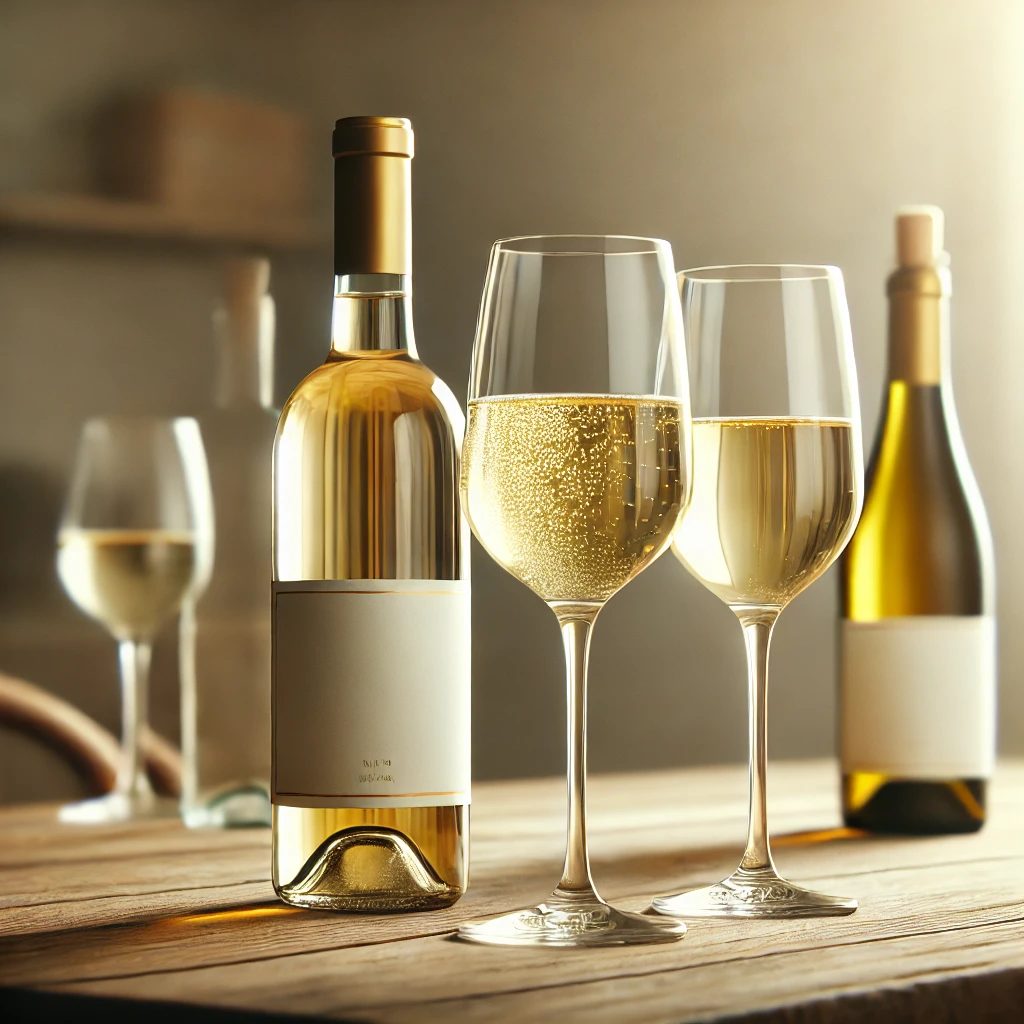

In [1]:
from IPython.display import Image, display


image = 'Wine Picture.png'

display(Image(filename=image))

## 1. Introduction

Wine is one of the most appreciated beverages worldwide, and its quality is determined by various chemical and sensory factors. In this project, we will develop a predictive model to estimate the quality of white wine based on physicochemical characteristics such as acidity, alcohol content, and residual sugar. The dataset was used from the UCI Machine Learning Repository.

The main objective is to apply Linear Regression and Regularization techniques (Lasso and Ridge) to create a robust model that provides accurate predictions of wine quality, assisting producers and experts in evaluating the beverage without the need for time-consuming and costly sensory tests.

Additionally, this project explores data normalization methods and statistical analysis to better understand the distribution of variables and ensure that the predictive model is suitable and efficient.

## 2. Data Exploration (EDA)

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Dataset
df = pd.read_excel('Qualidade vinho branco.xlsx')

In [4]:
# Firts five rows
df.head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Dataset Shape
print(f'The dataset contains {df.shape[1]} columns and {df.shape[0]} rows.')

The dataset contains 12 columns and 4898 rows.


In [6]:
# General Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez fixa               4898 non-null   float64
 1   Acidez volátil            4898 non-null   float64
 2   Ácido cítrico             4898 non-null   float64
 3   Açúcar residual           4898 non-null   float64
 4   Cloretos                  4898 non-null   float64
 5   Dióxido de enxofre livre  4898 non-null   float64
 6   Dióxido de enxofre total  4898 non-null   float64
 7   Densidade                 4898 non-null   float64
 8   pH                        4898 non-null   float64
 9   Sulfatos                  4898 non-null   float64
 10  Álcool                    4898 non-null   float64
 11  Qualidade                 4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Basic Statistics of the Dataset
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Acidez fixa,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
Acidez volátil,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
Ácido cítrico,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
Açúcar residual,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
Cloretos,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
Dióxido de enxofre livre,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
Dióxido de enxofre total,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
Densidade,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
Sulfatos,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [8]:
# Checking for Missing Data
print(df.isnull().sum())

Acidez fixa                 0
Acidez volátil              0
Ácido cítrico               0
Açúcar residual             0
Cloretos                    0
Dióxido de enxofre livre    0
Dióxido de enxofre total    0
Densidade                   0
pH                          0
Sulfatos                    0
Álcool                      0
Qualidade                   0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

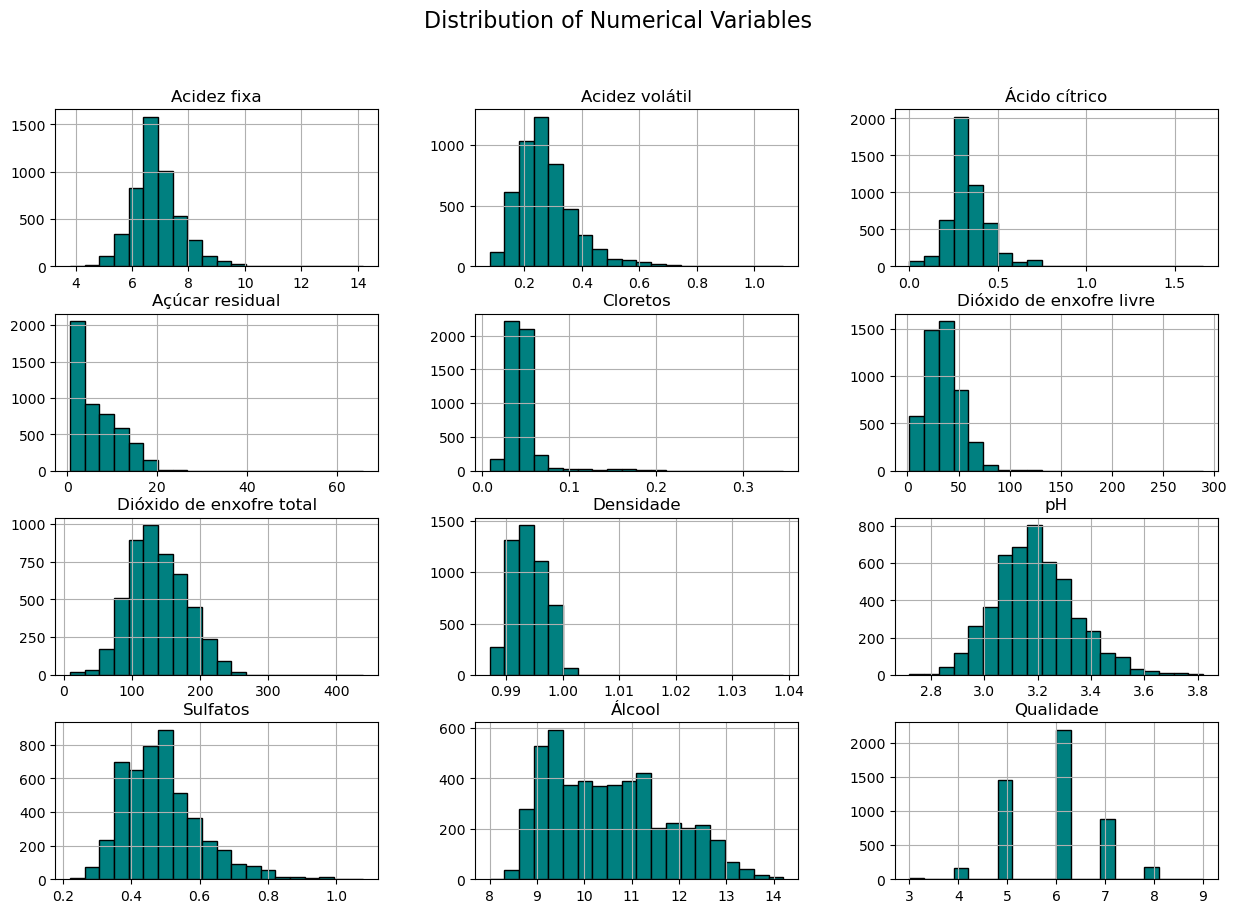

In [9]:
# Visualization of Variables Distribution
plt.figure(figsize=(15, 10))
df.hist(bins=20, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

#### Distribution of Variables:
* The analysis of the variable distributions shows that some of them exhibit skewed distributions, such as 'Alcohol', which has a longer tail towards higher values. This suggests that most wines have a moderate alcohol content, with only a few cases of higher alcohol levels.

* Other variables, such as 'Density' and 'pH', present more concentrated distributions, indicating greater uniformity in the recorded values.

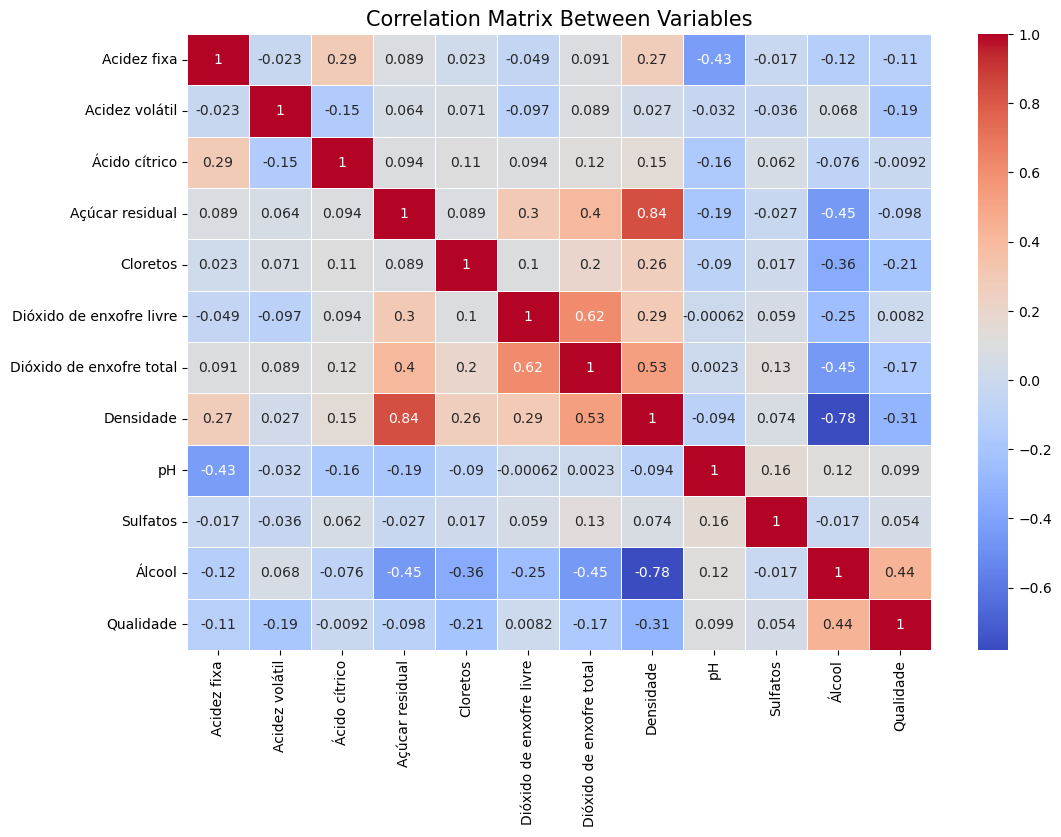

In [10]:
# Identification of Potential Correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Variables', fontsize=15)
plt.show()

#### Correlation with Quality:
* The correlation analysis identified that 'Alcohol' has the most significant positive correlation with wine quality. This behavior is expected since higher alcohol content can contribute to desirable sensory characteristics.

* On the other hand, 'Density' has a considerable negative correlation with quality. This effect can be explained by the fact that wines with higher alcohol content tend to have lower densities, which reflects in the negative correlation.

* Other variables, such as 'Volatile Acidity' and 'Free Sulfur Dioxide', show weaker correlations, suggesting a minor impact on the final quality.

In [11]:
# Identification of the Variables Most Correlated with Quality (our target)
correlations = df.corr()['Qualidade'].sort_values(ascending=False)
print(f'Correlation of Variables with Quality: \n{correlations}')

Correlation of Variables with Quality: 
Qualidade                   1.000000
Álcool                      0.435575
pH                          0.099427
Sulfatos                    0.053678
Dióxido de enxofre livre    0.008158
Ácido cítrico              -0.009209
Açúcar residual            -0.097577
Acidez fixa                -0.113663
Dióxido de enxofre total   -0.174737
Acidez volátil             -0.194723
Cloretos                   -0.209934
Densidade                  -0.307123
Name: Qualidade, dtype: float64


We will further analyze the correlation of variables with Quality in the form of a graph to achieve a better visualization.

C:\Users\Izabella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


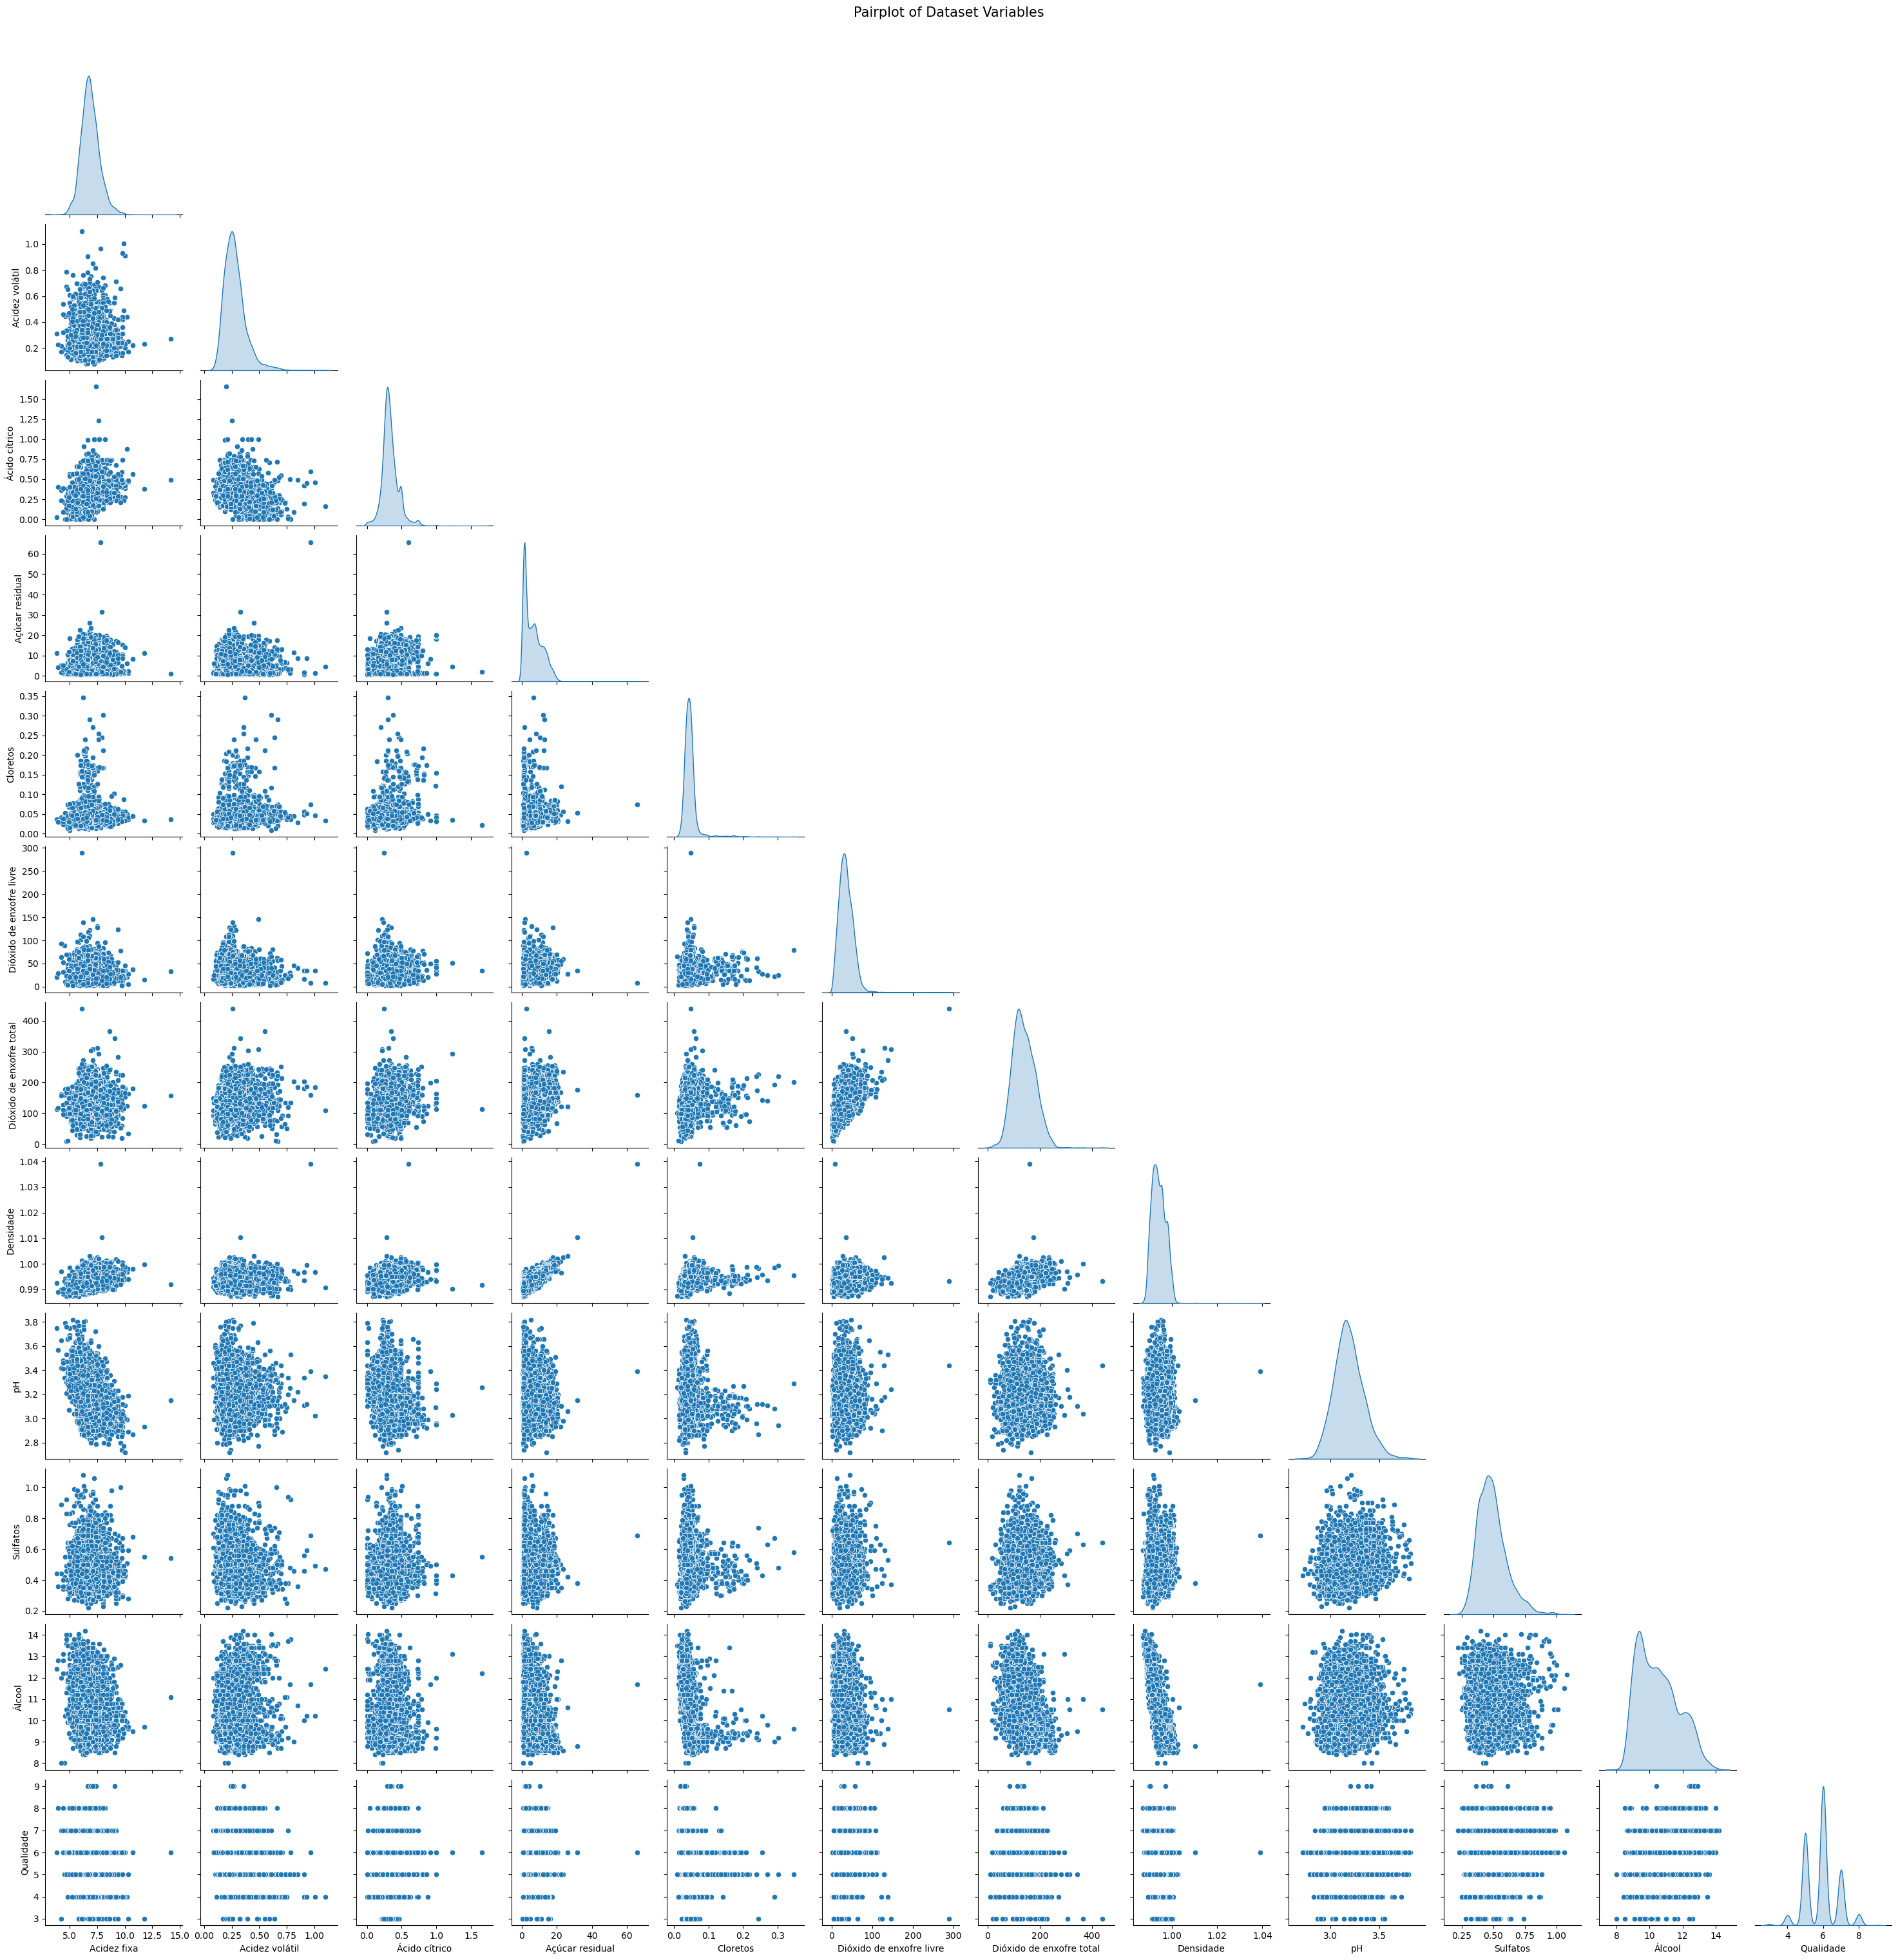

In [12]:
# Pairplot Graph for Multiple Variable Analysis
pairplot = sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Dataset Variables', y=1.02, fontsize=15)
plt.show()

#### Visual Comparison of Variables - Pairplot
* The pairplot shows the joint distribution between variables, highlighting visual relationships that may not be evident through numerical correlation.

* It is observed that some variables exhibit clear linear patterns, while others have a more scattered distribution.

* The scatter plots reinforce the observation that as alcohol content increases, quality also tends to increase.

* The relationship between 'Density' and 'Quality' shows an inverse trend, confirming the negative correlation identified.

C:\Users\Izabella\AppData\Local\Temp\ipykernel_14664\2262851737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')


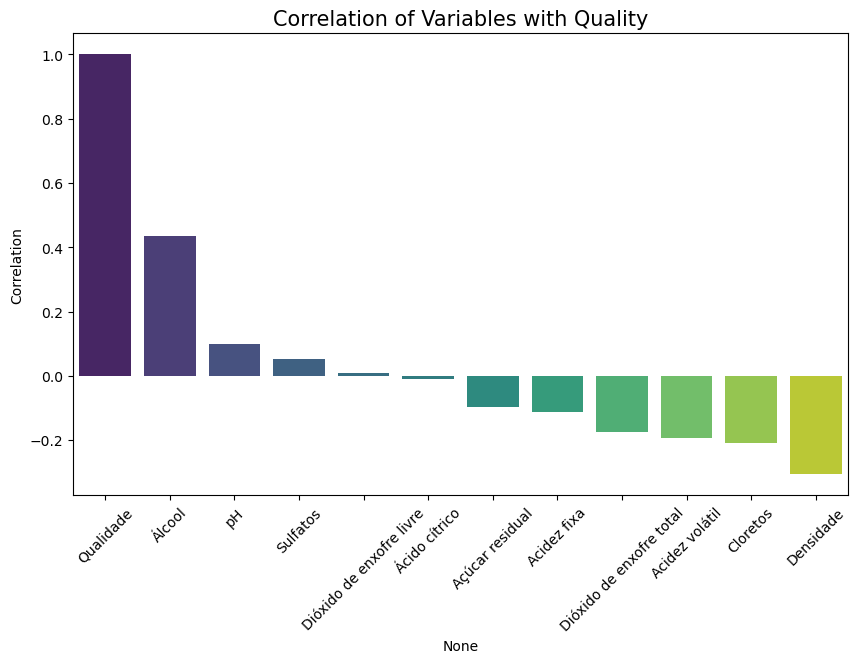

In [13]:
# Bar Plot of Correlations with the Target
correlations = df.corr()['Qualidade'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation of Variables with Quality', fontsize=15)
plt.ylabel('Correlation')
plt.show()

#### Visual Comparison of Variables - Bar Chart
The bar chart displaying correlations provides a clear representation of the relative influence of each variable on wine quality, making it easier to identify potentially important variables for predictive modeling.

    * Alcohol, pH, and Sulfates were the variables with the highest positive correlation.

    * Density was the variable with the highest negative correlation.

#### Recommendations for Modeling:
* Due to the low correlation of some variables, it may be useful to apply feature selection techniques to reduce noise in the model and improve predictive performance.

* Test models with and without these variables and compare performance to verify if their removal is beneficial.

* Implement the Recursive Feature Elimination (RFE) technique to identify the most important variables and remove those with lower contribution.

# Feature Engineering

In [14]:
# Outlier Removal using the IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
# Definition of Features and Target
features = df.drop('Qualidade', axis=1)
target = df['Qualidade']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Acidez fixa'),
  Text(2, 0, 'Acidez volátil'),
  Text(3, 0, 'Ácido cítrico'),
  Text(4, 0, 'Açúcar residual'),
  Text(5, 0, 'Cloretos'),
  Text(6, 0, 'Dióxido de enxofre livre'),
  Text(7, 0, 'Dióxido de enxofre total'),
  Text(8, 0, 'Densidade'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'Sulfatos'),
  Text(11, 0, 'Álcool')])

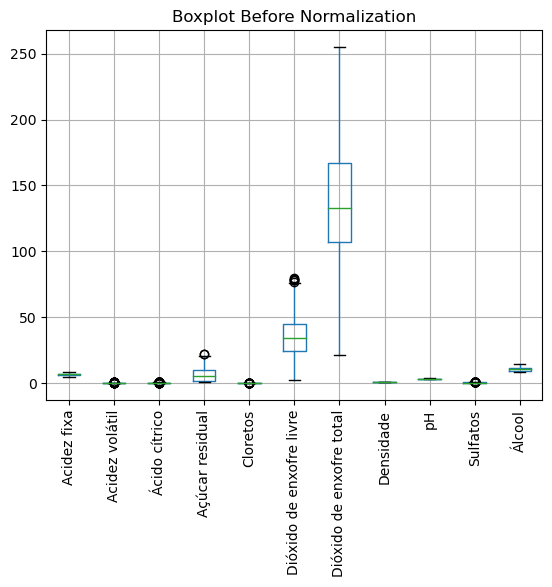

In [16]:
# Boxplot Before Normalization - Features
features.boxplot()
plt.title('Boxplot Before Normalization')
plt.xticks(rotation=90)

In [17]:
# Data Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Acidez fixa'),
  Text(2, 0, 'Acidez volátil'),
  Text(3, 0, 'Ácido cítrico'),
  Text(4, 0, 'Açúcar residual'),
  Text(5, 0, 'Cloretos'),
  Text(6, 0, 'Dióxido de enxofre livre'),
  Text(7, 0, 'Dióxido de enxofre total'),
  Text(8, 0, 'Densidade'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'Sulfatos'),
  Text(11, 0, 'Álcool')])

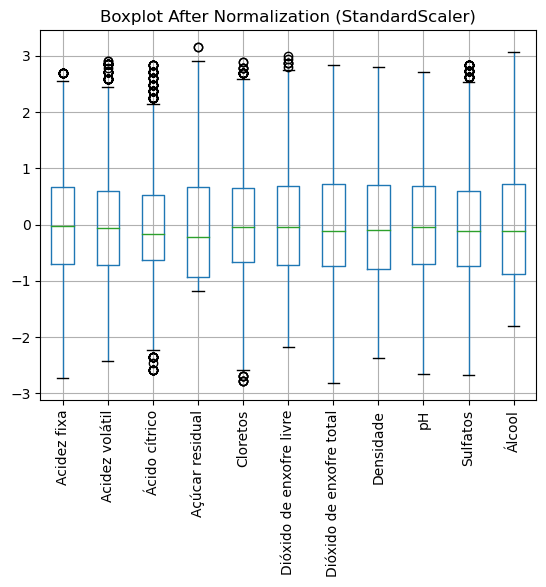

In [18]:
# Boxplot After Normalization - Features
x_scaled_df = pd.DataFrame(x_scaled, columns=features.columns)
x_scaled_df.boxplot()
plt.title('Boxplot After Normalization (StandardScaler)')
plt.xticks(rotation=90)

In [19]:
# Selection of Most Relevant Features
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
x_selected = selector.fit_transform(x_scaled, target)
scores = pd.Series(selector.scores_, index=features.columns).sort_values(ascending=False)

In [20]:
# Displaying Feature Scores
print(f'Feature Importance with SelectKBest: \n{scores}')

Feature Importance with SelectKBest: 
Álcool                      812.458202
Densidade                   395.935973
Cloretos                    337.654082
Dióxido de enxofre total    127.217154
Acidez volátil               71.066867
Açúcar residual              59.253763
pH                           23.425869
Acidez fixa                  15.364469
Sulfatos                      4.815530
Ácido cítrico                 1.145246
Dióxido de enxofre livre      0.030113
dtype: float64


The feature importance analysis using the SelectKBest method revealed that the most relevant variables for predicting white wine quality are:

Alcohol - Score: 736.24
It has the most significant influence on quality, possibly related to the wine's balance of flavor and mouthfeel, as alcohol is an essential component that can affect both aroma and body perception.

Density - Score: 359.34
It negatively impacts quality. Wines with higher density generally have higher concentrations of residual sugars, which may be associated with sweeter and less refined wines.

Chlorides - Score: 316.23
Reflects saline characteristics that can negatively influence flavor, especially if present in high concentrations, impairing the wine’s sensory perception.

These three attributes have the highest scores and should be considered a priority during the development of the regression model. Chemical characteristics such as acids and sulfates have a lower impact but may still provide relevant contributions to the model.

In [21]:
# Function for Calculating Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def calculate_performance(target, predicted_target):
  mse = mean_squared_error(target, predicted_target)
  rmse = mse**0.5
  mae = mean_absolute_error(target, predicted_target)
  mape = mean_absolute_percentage_error(target, predicted_target)*100
  r2 = r2_score(target, predicted_target)

  print('MSE: {:.3f}\nRMSE: {:.3f}\nMAE: {:.3f}\nMAPE: {:.3f}\nR2: {:.3f}\n'.format(mse, rmse, mae, mape, r2))
  return mse, rmse, mae, mape, r2

# 3. Application of Regression Models

In [22]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.2, random_state=42)

In [23]:
# Models to be Evaluated
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

In [24]:
# Models Evaluation
results = {}
y_pred_all = {}

for name, model in models.items():
  # Training the Model
  model.fit(x_train, y_train)

  # Making Predictions
  y_pred = model.predict(x_test)

  # Saving Predictions for Visual Comparison
  y_pred_all[name] = y_pred

  # Calculating Performance Metrics
  print(f'\nModel Performance: {name}')
  results[name] = calculate_performance(y_test, y_pred)


Model Performance: Linear Regression
MSE: 0.470
RMSE: 0.685
MAE: 0.563
MAPE: 9.888
R2: 0.233


Model Performance: Lasso
MSE: 0.516
RMSE: 0.719
MAE: 0.582
MAPE: 10.294
R2: 0.157


Model Performance: Ridge
MSE: 0.470
RMSE: 0.685
MAE: 0.563
MAPE: 9.888
R2: 0.233


Model Performance: Decision Tree
MSE: 0.582
RMSE: 0.763
MAE: 0.460
MAPE: 8.221
R2: 0.051



In [27]:
# Displaying Results as a DataFrame:
df_results = pd.DataFrame(results).T
print('Model Results:')
display(df_results)

Model Results:


,0,1,2,3,4
Linear Regression,0.469876,0.685475,0.563062,9.888433,0.233158
Lasso,0.516306,0.718544,0.581839,10.294081,0.157383
Ridge,0.469878,0.685477,0.563064,9.888480,0.233154
Decision Tree,0.581606,0.762631,0.459845,8.221379,0.050813


# 4. Visual Comparison of Models

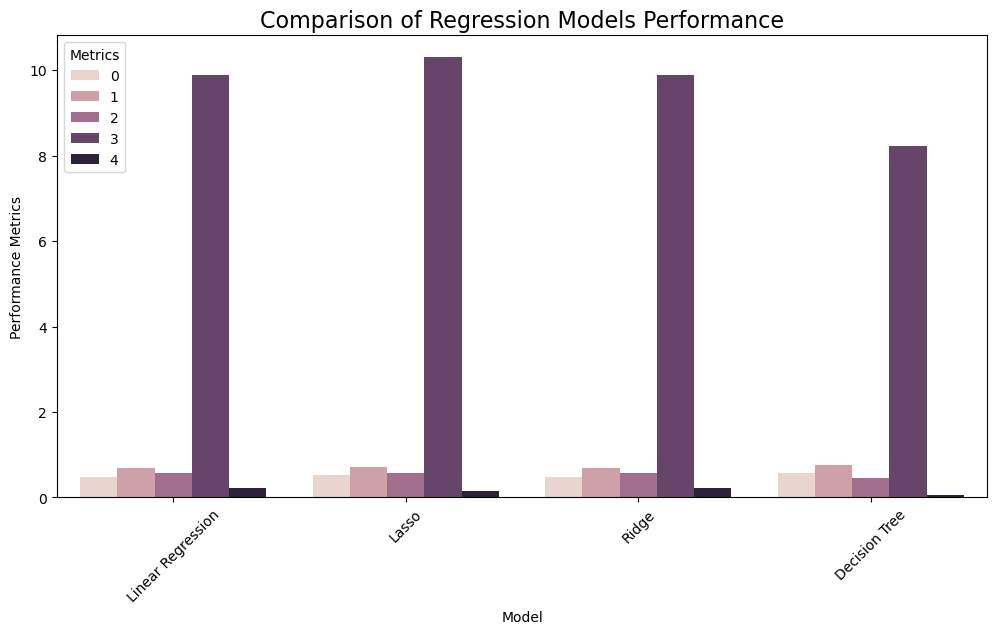

In [28]:
# Display the results as a graph
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title('Comparison of Regression Models Performance', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Performance Metrics')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.show()

# Conclusion

In this project, we successfully developed predictive models to estimate the quality of white wine based on its physicochemical properties. Through data exploration, feature selection, and regression techniques, we identified the most relevant features for predicting wine quality: Alcohol, Density, and Chlorides.

The performance comparison between Linear Regression, Lasso, Ridge Regression and Decision Tree models showed that Linear Regression provided the most accurate predictions.

This approach demonstrates how machine learning can be a powerful tool to assist wine producers and specialists by providing a cost-effective and time-efficient method for wine quality evaluation, without the need for extensive sensory testing.

Future improvements could include experimenting with other regression models, implementing techniques like cross-validation, and testing advanced algorithms like Decision Trees or Random Forests to enhance prediction accuracy.